<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Importation des librairies</h3>
</div>


In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from scipy.stats import chi2_contingency

In [6]:
from scipy import stats

In [7]:
import statsmodels.api as sm

In [8]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [9]:
from scipy.stats import spearmanr

In [10]:
import statsmodels.formula.api as smf

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Chargement des fichiers</h3>
</div>

In [11]:
#Importation du fichier transaction.csv
tran = pd.read_csv("Transactions.csv",sep=';')
#Importation du fichier products.csv
prod = pd.read_csv("products.csv",sep=';')
#importation du fichier customers.csv
cust = pd.read_csv("customers.csv",sep=';')

C:\Users\maxen\AppData\Local\Temp\ipykernel_41104\282477990.py:2: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  tran = pd.read_csv("Transactions.csv",sep=';')


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Analyse des fichiers</h3>
</div>

Ficher transaction.csv

In [12]:
#Affichage des dimensions du dataset
print("les dimmensions du dataset transaction sont :", tran.shape)

les dimmensions du dataset transaction sont : (1048575, 4)


In [13]:
#Consultation du nombre de colonnes
print("Le tableau transaction comporte {} colonne(s)".format(tran.shape[1]))
#La nature des données dans chacune des colonnes (ndd)
ndd = tran.dtypes
print(ndd)
#Le nombre de valeurs présentes dans chacune des colonnes (ndv)
ndv = tran.count()
print(ndv)

Le tableau transaction comporte 4 colonne(s)
id_prod       object
date          object
session_id    object
client_id     object
dtype: object
id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64


In [14]:
#Affichage des 5 premières lignes de la table
tran

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
1048570,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN


In [15]:
tran = tran.dropna()
tran

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


Séparation de la date et de l'heure

In [16]:
tran['date'] = tran['date'].str[:10]
tran['date'] = pd.to_datetime(tran['date'],format='%Y-%m-%d')
tran.head()

C:\Users\maxen\AppData\Local\Temp\ipykernel_41104\2683863620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran['date'] = tran['date'].str[:10]
C:\Users\maxen\AppData\Local\Temp\ipykernel_41104\2683863620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran['date'] = pd.to_datetime(tran['date'],format='%Y-%m-%d')


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01,s_1,c_329
1,0_1390,2021-03-01,s_2,c_664
2,0_1352,2021-03-01,s_3,c_580
3,0_1458,2021-03-01,s_4,c_7912
4,0_1358,2021-03-01,s_5,c_2033


Ficher production.csv

In [17]:
#Affichage des dimensions du dataset
print("les dimmensions du dataset production sont :", prod.shape)

les dimmensions du dataset production sont : (3286, 3)


In [18]:
#Consultation du nombre de colonnes
print("Le tableau production comporte {} colonne(s)".format(prod.shape[1]))
#La nature des données dans chacune des colonnes (ndd)
ndd = prod.dtypes
print(ndd)
#Le nombre de valeurs présentes dans chacune des colonnes (ndv)
ndv = prod.count()
print(ndv)

Le tableau production comporte 3 colonne(s)
id_prod     object
price      float64
categ        int64
dtype: object
id_prod    3286
price      3286
categ      3286
dtype: int64


In [19]:
#Affichage des 5 premières lignes de la table
prod.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


Ficher customers.csv

In [20]:
#Affichage des dimensions du dataset
print("les dimmensions du dataset customers sont :", cust.shape)

les dimmensions du dataset customers sont : (8621, 3)


In [21]:
#Consultation du nombre de colonnes
print("Le tableau customers comporte {} colonne(s)".format(cust.shape[1]))
#La nature des données dans chacune des colonnes (ndd)
ndd = cust.dtypes
print(ndd)
#Le nombre de valeurs présentes dans chacune des colonnes (ndv)
ndv = cust.count()
print(ndv)

Le tableau customers comporte 3 colonne(s)
client_id    object
sex          object
birth         int64
dtype: object
client_id    8621
sex          8621
birth        8621
dtype: int64


In [22]:
#Affichage des 5 premières lignes de la table
cust.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Jointure entre Transaction et Production</h3>
</div>


In [23]:
base = pd.merge(tran, prod, on ="id_prod", how="left")
base['date'] = pd.to_datetime(base['date'])
base['periode'] = base['date'].dt.to_period('M').astype(str)
base['annee'] = base['date'].dt.year
base['mois'] = base['date'].dt.month
base.head()

,id_prod,date,session_id,client_id,price,categ,periode,annee,mois
0,0_1259,2021-03-01,s_1,c_329,11.99,0,2021-03,2021,3
1,0_1390,2021-03-01,s_2,c_664,19.37,0,2021-03,2021,3
2,0_1352,2021-03-01,s_3,c_580,4.50,0,2021-03,2021,3
3,0_1458,2021-03-01,s_4,c_7912,6.55,0,2021-03,2021,3
4,0_1358,2021-03-01,s_5,c_2033,16.49,0,2021-03,2021,3


In [24]:
date_min = base['date'].min()
print("La première date est:", date_min)
date_max = base['date'].max()
print("La dernière date est:", date_max)

La première date est: 2021-03-01 00:00:00
La dernière date est: 2023-02-28 00:00:00


In [25]:
ndd = base.dtypes
ndd

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                  int64
periode               object
annee                  int32
mois                   int32
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Chiffre d'Affaire avec moyenne mobile</h3>
</div>

In [26]:
ca_mensuel = base.copy()
ca_mensuel['periode'] = pd.to_datetime(ca_mensuel['periode'], errors='coerce')
ca_mensuel = ca_mensuel.groupby(['periode'])['price'].sum().reset_index()
ca_mensuel = ca_mensuel[ca_mensuel['periode'].notna()]
ca_mensuel = ca_mensuel.rename(columns={'price': 'chiffre_affaires'})

# Moyenne mobile
fenetre = 3
ca_mensuel['moyenne_mobile'] = ca_mensuel['chiffre_affaires'].rolling(window=fenetre, center=True, min_periods=1).mean()
ca_mensuel['moyenne_mobile'] = ca_mensuel['moyenne_mobile'].round(2)

ca_mensuel

,periode,chiffre_affaires,moyenne_mobile
0,2021-03-01,482440.61,479274.95
1,2021-04-01,476109.30,483831.13
2,2021-05-01,492943.47,484380.44
3,2021-06-01,484088.56,486622.48
4,2021-07-01,482835.40,483069.58
5,2021-08-01,482284.79,490786.96
6,2021-09-01,507240.68,494752.88
7,2021-10-01,494733.16,506047.19
8,2021-11-01,516167.73,512272.72
9,2021-12-01,525917.28,522474.67


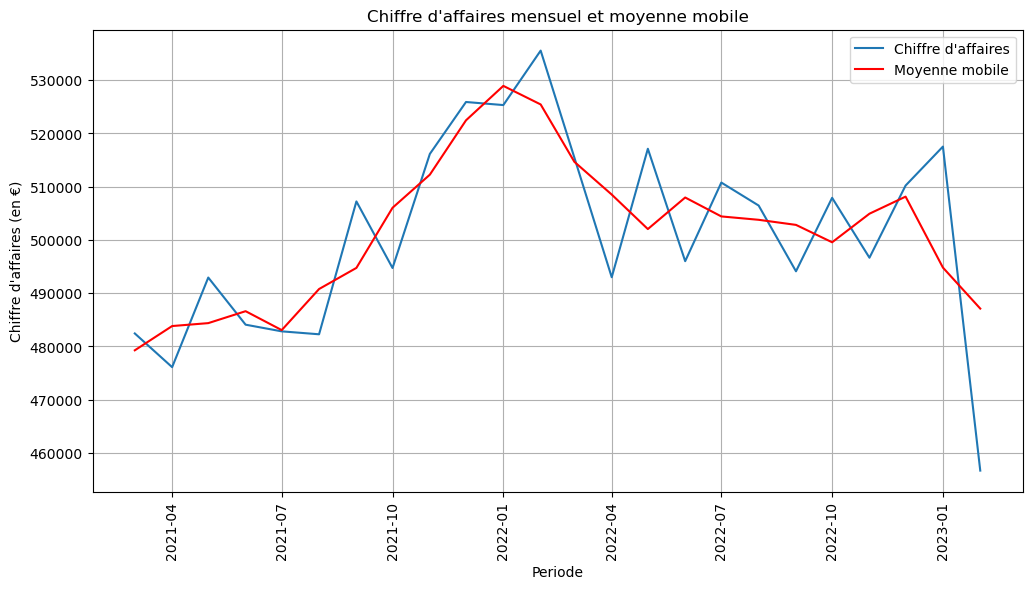

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(ca_mensuel['periode'], ca_mensuel['chiffre_affaires'], label="Chiffre d'affaires")
plt.plot(ca_mensuel['periode'], ca_mensuel['moyenne_mobile'], label='Moyenne mobile', color='red')
plt.legend()
plt.title('Chiffre d\'affaires mensuel et moyenne mobile')
plt.xlabel('Periode')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Chiffre d'Affaire par catégorie</h3>
</div>

In [28]:
ca_categorie = base.groupby(['annee','categ'])['price'].sum().reset_index()
ca_categorie.head(50)

,annee,categ,price
0,2021,0,1883020.45
1,2021,1,1951930.27
2,2021,2,1109810.26
3,2022,0,2192970.46
4,2022,1,2485275.19
5,2022,2,1430436.16
6,2023,0,343740.06
7,2023,1,390451.65
8,2023,2,240028.60


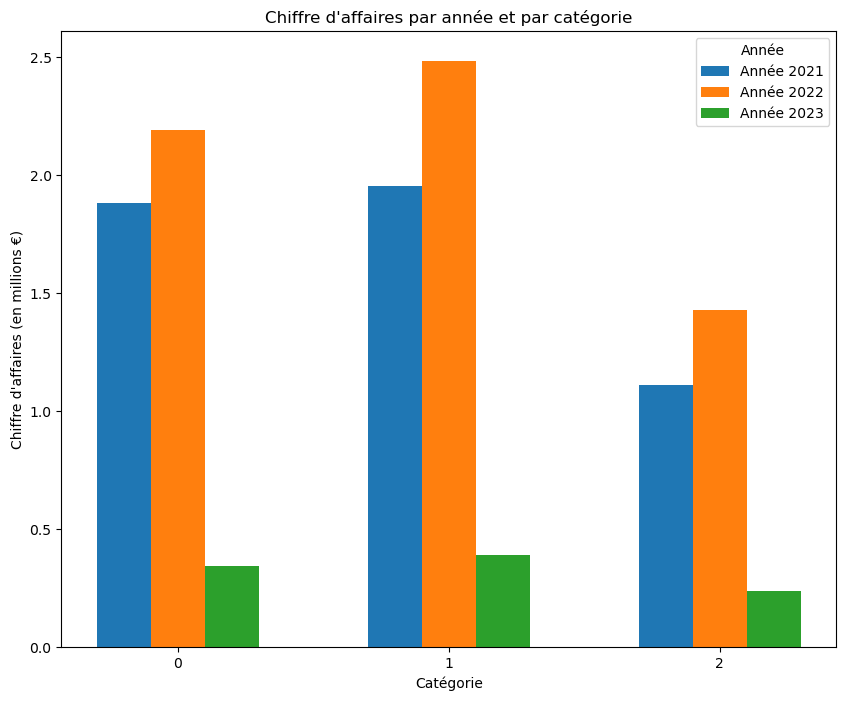

In [29]:
plt.figure(figsize=(10, 8))
largeur_barre = 0.2 
categories = ca_categorie['categ'].unique()  
positions = np.arange(len(categories)) 


for i, annee in enumerate(ca_categorie['annee'].unique()):

    subset = ca_categorie[ca_categorie['annee'] == annee]
  
    plt.bar(positions + i * largeur_barre, subset['price']/1000000, width=largeur_barre, label=f'Année {annee}')


plt.xticks(positions + largeur_barre, categories)
plt.title("Chiffre d'affaires par année et par catégorie")
plt.xlabel('Catégorie')
plt.ylabel("Chiffre d'affaires (en millions €)")
plt.legend(title="Année")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Nombre de clients par mois</h3>
</div>

In [30]:
nbr_clients = base
nbr_clients = nbr_clients.groupby(['periode'])['client_id'].nunique().reset_index()
nbr_clients['periode'] = pd.to_datetime(nbr_clients['periode'], errors='coerce')
nbr_clients = nbr_clients.rename(columns={'client_id':'nombre_clients'})
nbr_clients = nbr_clients[nbr_clients['periode'].notna()]
nbr_clients.head()

,periode,nombre_clients
0,2021-03-01,5676
1,2021-04-01,5674
2,2021-05-01,5644
3,2021-06-01,5659
4,2021-07-01,5672


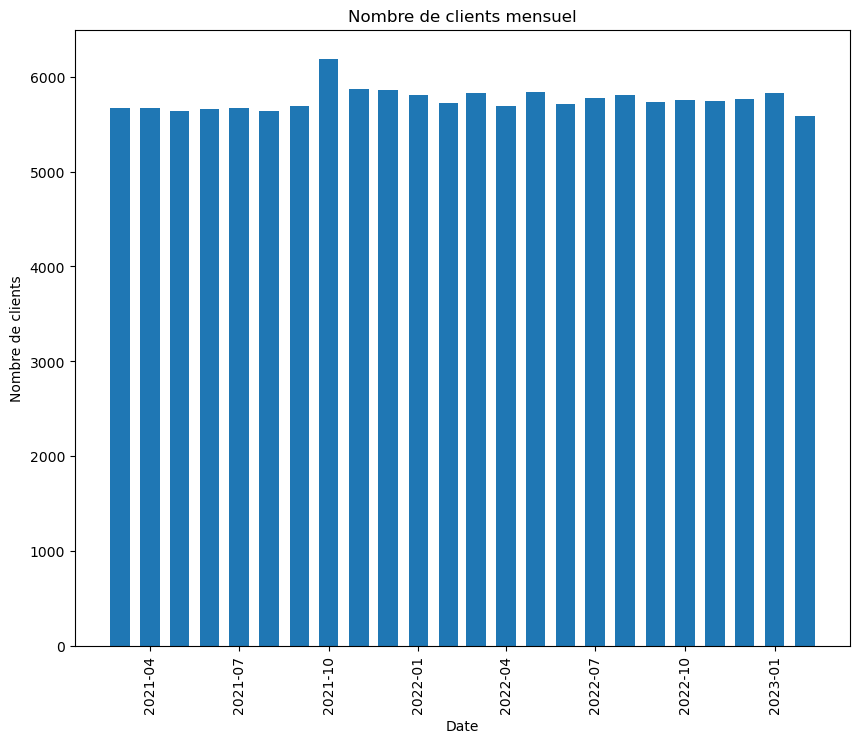

In [31]:
plt.figure(figsize=(10, 8))
plt.bar(nbr_clients['periode'], nbr_clients['nombre_clients'], width=20, align='center')
plt.title('Nombre de clients mensuel')
plt.xlabel('Date')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=90)

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Nombre de transactions</h3>
</div>

In [32]:
transac_mois = base
transac_mois = transac_mois.groupby(['periode'])['session_id'].nunique().reset_index()
transac_mois['periode'] = pd.to_datetime(transac_mois['periode'], errors='coerce')
transac_mois = transac_mois.rename(columns={'session_id':'nombre_transactions'})
transac_mois = transac_mois[transac_mois['periode'].notna()]
transac_mois.head()

,periode,nombre_transactions
0,2021-03-01,14201
1,2021-04-01,13970
2,2021-05-01,14168
3,2021-06-01,13838
4,2021-07-01,13571


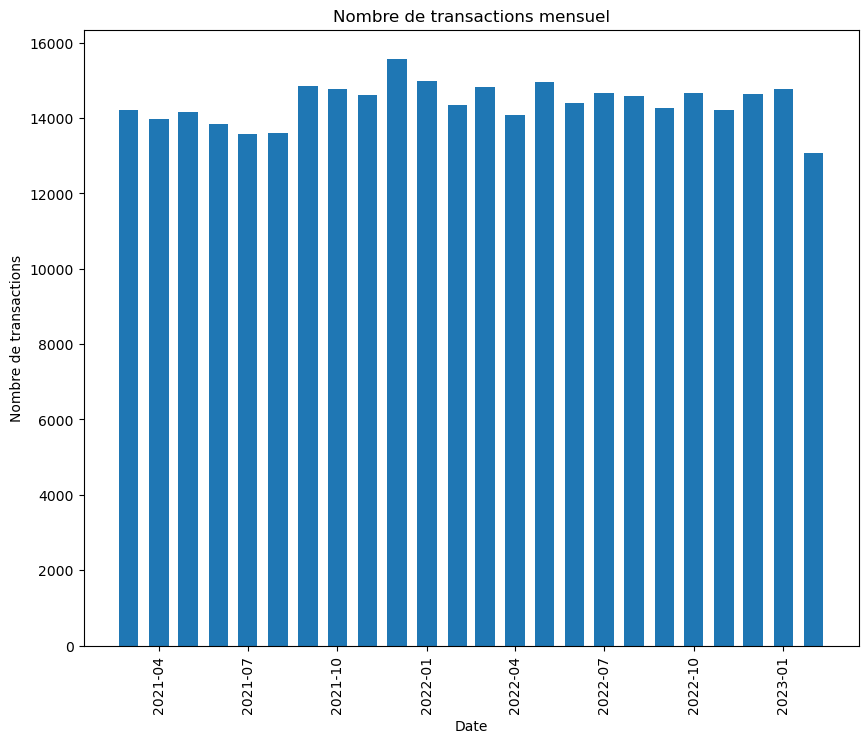

In [33]:
plt.figure(figsize=(10, 8))
plt.bar(transac_mois['periode'], transac_mois['nombre_transactions'], width=20, align='center')
plt.title('Nombre de transactions mensuel')
plt.xlabel('Date')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=90)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Nombre de produits vendus</h3>
</div>

In [34]:
produit_mois = base.groupby(['annee', 'mois']).size().reset_index(name='nombre_produits_vendus')
produit_mois['date'] = produit_mois['mois'].astype(str) + '-' + produit_mois['annee'].astype(str)
produit_mois.head()

,annee,mois,nombre_produits_vendus,date
0,2021,3,28601,3-2021
1,2021,4,28443,4-2021
2,2021,5,28285,5-2021
3,2021,6,26850,6-2021
4,2021,7,24738,7-2021


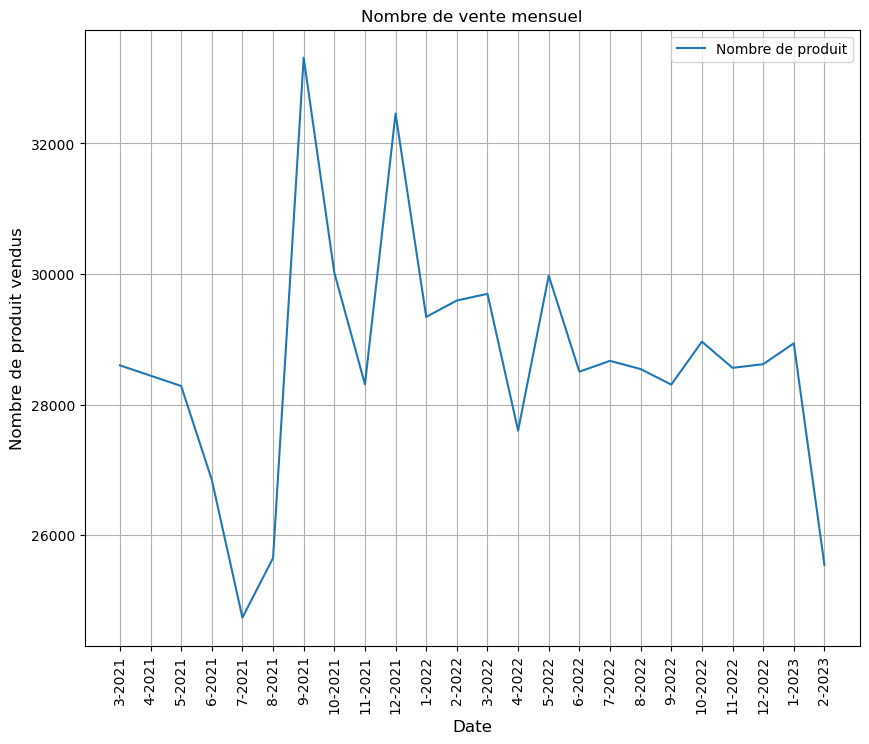

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(produit_mois['date'], produit_mois['nombre_produits_vendus'], label="Nombre de produit")
plt.legend()
plt.title('Nombre de vente mensuel')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Nombre de produit vendus', fontsize=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Tops références</h3>
</div>

In [36]:
vente_produit = base.groupby('id_prod')['price'].sum().sort_values(ascending=False).reset_index()
top_10 = vente_produit.head(10)
top_10

,id_prod,price
0,2_159,94893.50
1,2_135,69334.95
2,2_112,65407.76
3,2_102,60736.78
4,2_209,56971.86
5,1_395,56617.47
6,1_369,56136.60
7,2_110,53846.25
8,1_383,53834.43
9,1_414,53522.18


In [37]:
flop_10 = vente_produit.tail(10)
flop_10

,id_prod,price
3255,0_1840,2.56
3256,0_898,2.54
3257,0_1498,2.48
3258,0_1728,2.27
3259,0_807,1.99
3260,0_1601,1.99
3261,0_541,1.99
3262,0_1653,1.98
3263,0_1284,1.38
3264,0_1539,0.99


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Répartition par catégorie</h3>
</div>

In [38]:
ventes_categ = base.groupby('categ')['price'].sum().reset_index()
total_ventes = ventes_categ['price'].sum()
ventes_categ['pourcentage'] = (ventes_categ['price'] / total_ventes) * 100
ventes_categ['pourcentage'] = ventes_categ['pourcentage'].round(2)
ventes_categ

,categ,price,pourcentage
0,0,4419730.97,36.75
1,1,4827657.11,40.14
2,2,2780275.02,23.12


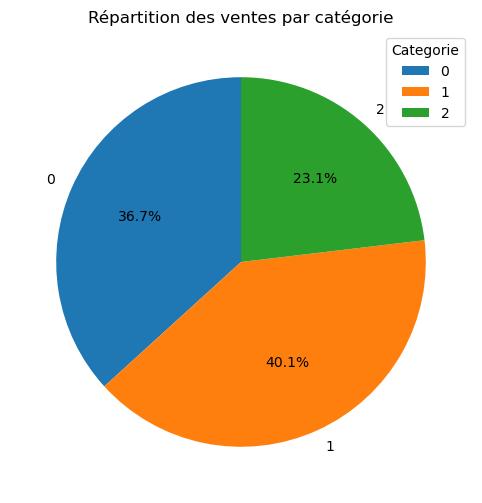

In [39]:
plt.figure(figsize=(12, 6))
plt.pie(ventes_categ['pourcentage'], 
        labels=ventes_categ['categ'], 
        autopct='%1.1f%%',
        startangle=90)

plt.title("Répartition des ventes par catégorie")
plt.legend(title="Categorie")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Répartition du chiffre d'affaires pour les clients BtoB</h3>
</div>

In [40]:
client = pd.merge(base, cust, left_on='client_id', right_on='client_id')
client = client.groupby('client_id')['price'].sum().reset_index()
client.columns = ['client_id', 'chiffre_affaires']
client

,client_id,chiffre_affaires
0,c_1,629.02
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2291.88
4,c_1001,1823.85
...,...,...
8595,c_995,189.41
8596,c_996,1637.34
8597,c_997,1490.01
8598,c_998,2822.22


In [41]:
client = pd.merge(client, cust, left_on='client_id', right_on='client_id')
client = client.sort_values('chiffre_affaires', ascending=False)
client.head(15)

,client_id,chiffre_affaires,sex,birth
677,c_1609,326039.89,m,1980
4388,c_4958,290227.03,m,1999
6337,c_6714,153918.60,f,1968
2724,c_3454,114110.57,m,1969
634,c_1570,5285.82,f,1979
2513,c_3263,5276.87,f,1985
1268,c_2140,5260.18,f,1977
2108,c_2899,5214.05,f,1994
7006,c_7319,5155.77,f,1974
7715,c_7959,5135.75,f,1974


In [42]:
ca_total = client['chiffre_affaires'].sum()
client['pourcentage_ca'] = (client['chiffre_affaires'] / ca_total * 100).round(2)
client

,client_id,chiffre_affaires,sex,birth,pourcentage_ca
677,c_1609,326039.89,m,1980,2.71
4388,c_4958,290227.03,m,1999,2.41
6337,c_6714,153918.60,f,1968,1.28
2724,c_3454,114110.57,m,1969,0.95
634,c_1570,5285.82,f,1979,0.04
...,...,...,...,...,...
3855,c_4478,13.36,f,1970,0.00
4044,c_4648,11.20,m,2004,0.00
7889,c_8114,9.98,m,1962,0.00
7918,c_8140,8.30,m,1971,0.00


In [43]:
nb_clients = client['client_id'].nunique()
print(f"Nombre total de clients : {nb_clients}")

Nombre total de clients : 8600


In [44]:
btob = ['c_1609','c_4958','c_6714','c_3454']
clients_btob = base[base['client_id'].isin(btob)]
btob_ca = clients_btob.groupby(['client_id', 'date'])['price'].sum().reset_index()
btob_ca

,client_id,date,price
0,c_1609,2021-03-01,222.79
1,c_1609,2021-03-02,341.79
2,c_1609,2021-03-03,302.16
3,c_1609,2021-03-04,680.96
4,c_1609,2021-03-05,539.96
...,...,...,...
2885,c_6714,2023-02-24,212.47
2886,c_6714,2023-02-25,199.58
2887,c_6714,2023-02-26,179.43
2888,c_6714,2023-02-27,191.94


In [45]:
btob_ca_pivot = btob_ca.pivot(index='date', columns='client_id', values='price')
btob_ca_pivot

client_id,c_1609,c_3454,c_4958,c_6714
date,,,,
2021-03-01,222.79,231.25,450.46,192.07
2021-03-02,341.79,111.69,NaN,474.50
2021-03-03,302.16,85.80,347.13,563.61
2021-03-04,680.96,268.27,652.08,27.14
2021-03-05,539.96,162.83,305.69,246.80
...,...,...,...,...
2023-02-24,519.98,115.03,451.57,212.47
2023-02-25,681.46,150.95,167.96,199.58
2023-02-26,430.55,114.15,380.74,179.43


In [46]:
btob_ca['date'] = pd.to_datetime(btob_ca['date'])
btob_ca['periode'] = btob_ca['date'].dt.to_period('M')
btob_ca_pivot = btob_ca.pivot_table(index='periode', 
                                    columns='client_id', 
                                    values='price', 
                                    aggfunc='sum')
btob_ca_pivot = btob_ca_pivot.reset_index()
btob_ca_pivot['periode'] = btob_ca_pivot['periode'].astype(str)
btob_ca_pivot

client_id,periode,c_1609,c_3454,c_4958,c_6714
0,2021-03,13740.67,4513.55,12073.43,6194.25
1,2021-04,13543.34,4465.28,12503.94,6258.89
2,2021-05,13583.81,4610.82,13407.12,6454.26
3,2021-06,12392.75,3792.24,14113.87,6687.53
4,2021-07,10591.50,3969.51,14962.60,5718.64
5,2021-08,11441.49,4169.03,15496.64,5175.33
6,2021-09,17392.13,4993.11,6930.53,7003.11
7,2021-10,13284.81,2343.86,7572.42,4134.85
8,2021-11,14198.61,5309.25,11096.49,7471.30
9,2021-12,16986.79,6187.95,8830.27,6188.87


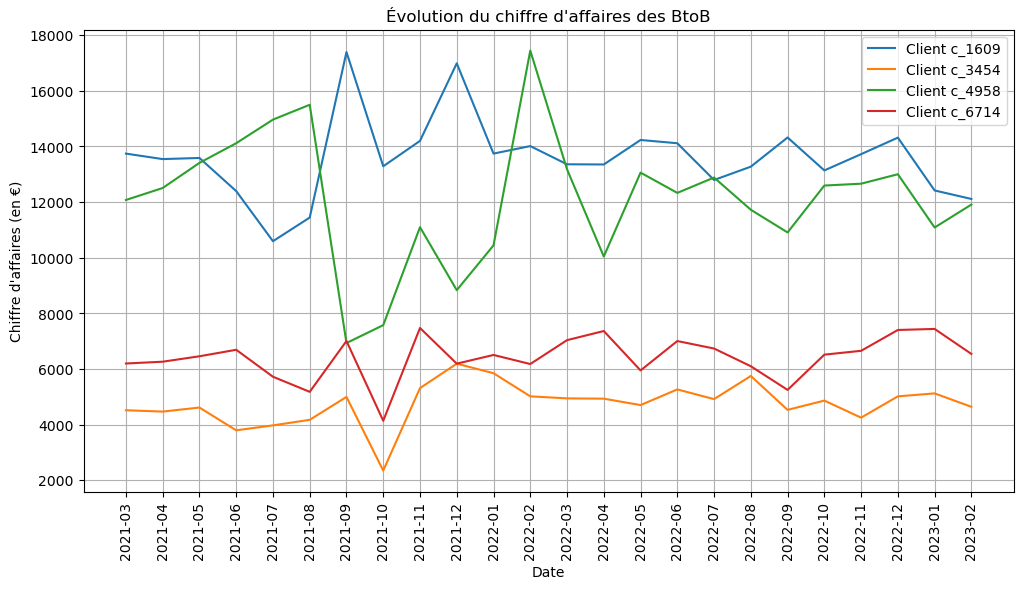

In [47]:
plt.figure(figsize=(12, 6))
for client in ['c_1609', 'c_3454', 'c_4958', 'c_6714']:
    plt.plot(btob_ca_pivot['periode'], btob_ca_pivot[client], label=f'Client {client}')
    
plt.title("Évolution du chiffre d'affaires des BtoB")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (en €)")
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Courbe de Lorenz</h3>
</div>

In [48]:
transactions_par_client = base.groupby('client_id')['price'].sum().reset_index()
total_transactions = transactions_par_client['price'].sum()
transactions_par_client['pourcentage'] = (transactions_par_client['price'] / total_transactions) * 100
transactions_par_client = transactions_par_client.sort_values('pourcentage').reset_index()
transactions_par_client

,index,client_id,price,pourcentage
0,8151,c_8351,6.31,0.000052
1,7918,c_8140,8.30,0.000069
2,7889,c_8114,9.98,0.000083
3,4044,c_4648,11.20,0.000093
4,3855,c_4478,13.36,0.000111
...,...,...,...,...
8595,634,c_1570,5285.82,0.043947
8596,2724,c_3454,114110.57,0.948734
8597,6337,c_6714,153918.60,1.279705
8598,4388,c_4958,290227.03,2.412996


In [49]:
transactions_par_client['pourcentage_cumul'] = transactions_par_client['pourcentage'].cumsum()
transactions_par_client['pourcentage_clients'] = np.arange(1, len(transactions_par_client) + 1) / len(transactions_par_client) * 100
transactions_par_client

,index,client_id,price,pourcentage,pourcentage_cumul,pourcentage_clients
0,8151,c_8351,6.31,0.000052,0.000052,0.011628
1,7918,c_8140,8.30,0.000069,0.000121,0.023256
2,7889,c_8114,9.98,0.000083,0.000204,0.034884
3,4044,c_4648,11.20,0.000093,0.000298,0.046512
4,3855,c_4478,13.36,0.000111,0.000409,0.058140
...,...,...,...,...,...,...
8595,634,c_1570,5285.82,0.043947,92.647815,99.953488
8596,2724,c_3454,114110.57,0.948734,93.596549,99.965116
8597,6337,c_6714,153918.60,1.279705,94.876254,99.976744
8598,4388,c_4958,290227.03,2.412996,97.289250,99.988372


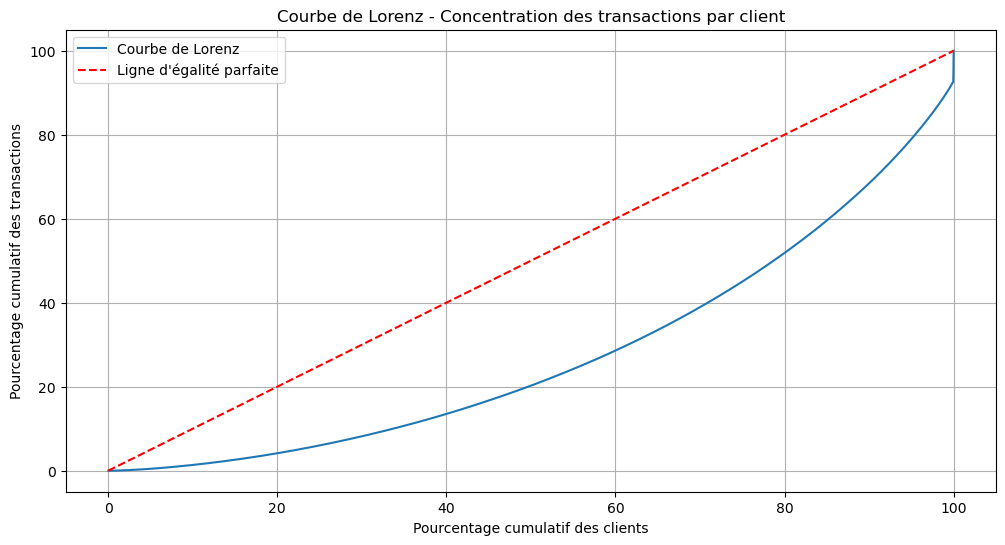

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(transactions_par_client['pourcentage_clients'], transactions_par_client['pourcentage_cumul'], label='Courbe de Lorenz')
plt.plot([0, 100], [0, 100], 'r--', label='Ligne d\'égalité parfaite')
plt.title('Courbe de Lorenz - Concentration des transactions par client')
plt.xlabel('Pourcentage cumulatif des clients')
plt.ylabel('Pourcentage cumulatif des transactions')
plt.grid()
plt.legend()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre le genre d'un client et les catégories de livres achetés</h3>
</div>

In [51]:
print("Identification des variables. Genre des clients : Qualitative. Catégorie de livre : Qualitative")

Identification des variables. Genre des clients : Qualitative. Catégorie de livre : Qualitative


In [52]:
print("Hypothèses du test")
print("Hypothèse nulle (H0): Il n'y a pas de relation significative entre le genre et les catégories de livres.Les deux variables sont indépendantes.") 
print("Hypothèse alternative (H1): Il existe une relation significative entre le genre et les catégories de livres. Les deux variables sont dépendantes ")

Hypothèses du test
Hypothèse nulle (H0): Il n'y a pas de relation significative entre le genre et les catégories de livres.Les deux variables sont indépendantes.
Hypothèse alternative (H1): Il existe une relation significative entre le genre et les catégories de livres. Les deux variables sont dépendantes 


In [53]:
comb = pd.merge(base, cust, on='client_id', how='left')
comb.head()

,id_prod,date,session_id,client_id,price,categ,periode,annee,mois,sex,birth
0,0_1259,2021-03-01,s_1,c_329,11.99,0,2021-03,2021,3,f,1967
1,0_1390,2021-03-01,s_2,c_664,19.37,0,2021-03,2021,3,m,1960
2,0_1352,2021-03-01,s_3,c_580,4.50,0,2021-03,2021,3,m,1988
3,0_1458,2021-03-01,s_4,c_7912,6.55,0,2021-03,2021,3,f,1989
4,0_1358,2021-03-01,s_5,c_2033,16.49,0,2021-03,2021,3,f,1956


In [54]:
print("Genre par catégorie")
categ_client = comb.groupby(['sex', 'categ']).size().unstack(fill_value=0)
categ_client_pourc = (categ_client.div(categ_client.sum(axis=1), axis=0) * 100).round(2)
categ_client_pourc

Genre par catégorie


categ,0,1,2
sex,,,
f,60.14,34.81,5.04
m,60.71,33.72,5.57


In [55]:
chi2, p_value, dof, expected = chi2_contingency(categ_client)
print("Résultats du test chi2:")
print(f"Valeur du chi2 : {chi2:.2f}")
print(f"P-value : {p_value:.4f}")

if p_value < 0.05:
    print("\nRejet de l'hypothèse nulle H0.")
    print("Conclusion : Il existe une relation significative entre le genre et les catégories de livres (H1). Les deux variables sont dépendantes")
else:
    print("\nOn ne rejette pas l'hypothèse nulle H0.")
    print("Conclusion : Il n'y a pas de relation significative entre le genre et les catégories de livres (H0).Les deux variables sont indépendantes")


Résultats du test chi2:
Valeur du chi2 : 158.25
P-value : 0.0000

Rejet de l'hypothèse nulle H0.
Conclusion : Il existe une relation significative entre le genre et les catégories de livres (H1). Les deux variables sont dépendantes


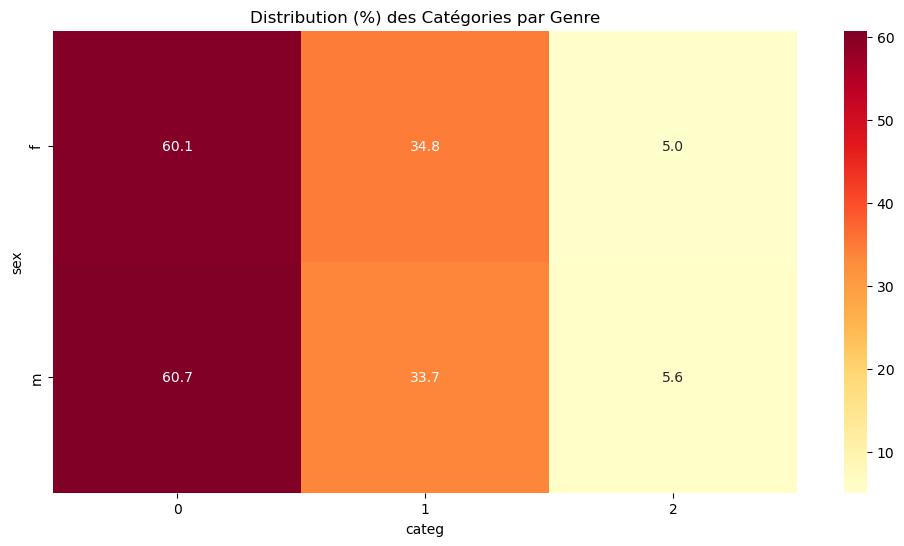

In [56]:
pourcentages = categ_client.div(categ_client.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
sns.heatmap(pourcentages, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Distribution (%) des Catégories par Genre')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre l'age des clients et le montant total des achats</h3>
</div>

In [57]:
print("Identification des variables. L'age des clients : Qualitative. Montant total des achats : Quantitative")

Identification des variables. L'age des clients : Qualitative. Montant total des achats : Quantitative


In [58]:
print("Hypothèses du test")
print("Hypothèse nulle (H0): Il n’y a pas de différence significative entre les montants d'achat selon les groupes d'âge. L'âge des clients n'influence pas le montant total des achats.") 
print("Hypothèse alternative (H1): Il existe une différence significative entre les montants d'achat selon les groupes d'âge. Les différents groupes d'âge présentent des comportements d'achat distincts en termes de montant.")

Hypothèses du test
Hypothèse nulle (H0): Il n’y a pas de différence significative entre les montants d'achat selon les groupes d'âge. L'âge des clients n'influence pas le montant total des achats.
Hypothèse alternative (H1): Il existe une différence significative entre les montants d'achat selon les groupes d'âge. Les différents groupes d'âge présentent des comportements d'achat distincts en termes de montant.


In [59]:
cust['age'] = 2024 - cust['birth']
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['[20-29]', '[30-39]', '[40-49]', '[50-59]', '[60-69]', '[70-79]', '[80-89]', '[90-99]']
cust['groupe_age'] = pd.cut(cust['age'], bins=bins, labels=labels, right = False)
comb = pd.merge(base, cust, on='client_id', how='left')
comb.head()

,id_prod,date,session_id,client_id,price,categ,periode,annee,mois,sex,birth,age,groupe_age
0,0_1259,2021-03-01,s_1,c_329,11.99,0,2021-03,2021,3,f,1967,57,[50-59]
1,0_1390,2021-03-01,s_2,c_664,19.37,0,2021-03,2021,3,m,1960,64,[60-69]
2,0_1352,2021-03-01,s_3,c_580,4.50,0,2021-03,2021,3,m,1988,36,[30-39]
3,0_1458,2021-03-01,s_4,c_7912,6.55,0,2021-03,2021,3,f,1989,35,[30-39]
4,0_1358,2021-03-01,s_5,c_2033,16.49,0,2021-03,2021,3,f,1956,68,[60-69]


In [60]:
age_groupe = comb.groupby('groupe_age')['price'].sum().reset_index()
total_price = age_groupe['price'].sum()
age_groupe['pourcentage'] = ((age_groupe['price'] / total_price) * 100).round(2)
age_groupe

,groupe_age,price,pourcentage
0,[20-29],2709584.63,22.53
1,[30-39],2420859.27,20.13
2,[40-49],3115164.52,25.90
3,[50-59],1987767.98,16.53
4,[60-69],1055204.89,8.77
5,[70-79],502059.37,4.17
6,[80-89],206913.82,1.72
7,[90-99],30108.62,0.25


In [61]:
sans_btob = comb[~comb['client_id'].isin(btob)]
age_groupe_sans_btob = sans_btob.groupby('groupe_age')['price'].sum().reset_index()
total_price_sb = age_groupe['price'].sum()
age_groupe_sans_btob['pourcentage'] = ((age_groupe_sans_btob['price'] / total_price_sb) * 100).round(2)
age_groupe_sans_btob

,groupe_age,price,pourcentage
0,[20-29],2419357.60,20.11
1,[30-39],2420859.27,20.13
2,[40-49],2789124.63,23.19
3,[50-59],1719738.81,14.30
4,[60-69],1055204.89,8.77
5,[70-79],502059.37,4.17
6,[80-89],206913.82,1.72
7,[90-99],30108.62,0.25


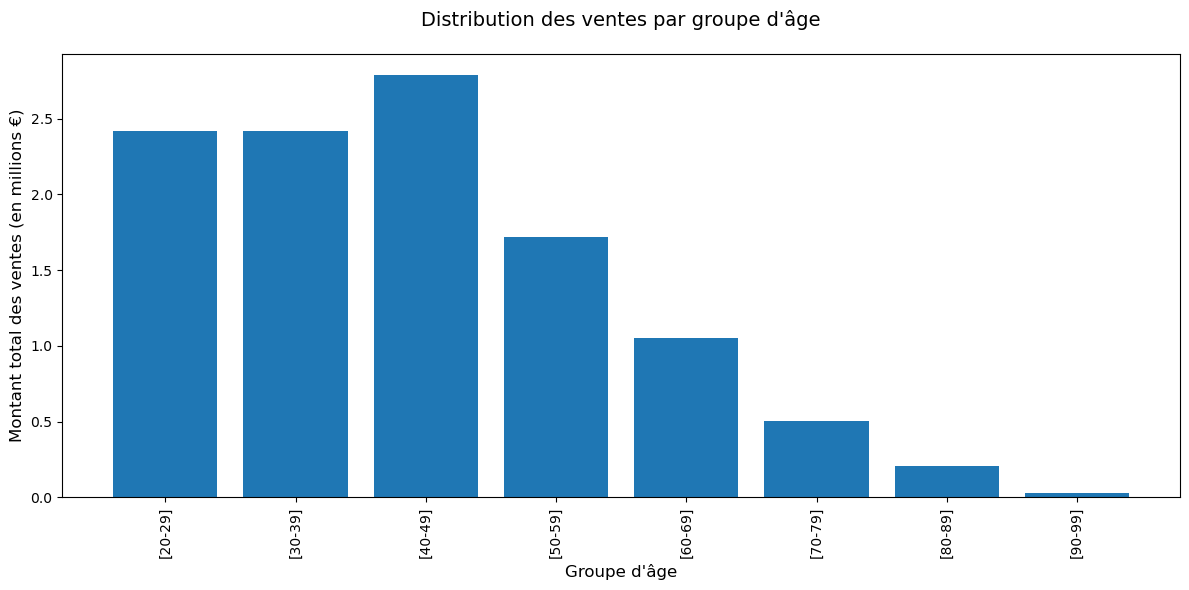

In [62]:
plt.figure(figsize=(12, 6))
bars = plt.bar(age_groupe_sans_btob['groupe_age'].astype(str), age_groupe_sans_btob['price']/ 1_000_000)
plt.title('Distribution des ventes par groupe d\'âge', fontsize=14, pad=20)
plt.xlabel('Groupe d\'âge', fontsize=12)
plt.ylabel('Montant total des ventes (en millions €)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [63]:
data = comb['price']

mu = data.mean() 
sigma = data.std() 

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(data, 'norm', args=(mu, sigma))

print(f'Statistique de Kolmogorov-Smirnov: {ks_test.statistic:.4f}, P-value: {ks_test.pvalue:.4f}')
if ks_test.pvalue < 0.05:
    print("Il y a des preuves que les données ne suivent pas une distribution normale (rejeter l'hypothèse nulle).")
else:
    print("Aucune preuve que les données ne suivent pas une distribution normale (ne pas rejeter l'hypothèse nulle).")

Statistique de Kolmogorov-Smirnov: 0.2294, P-value: 0.0000
Il y a des preuves que les données ne suivent pas une distribution normale (rejeter l'hypothèse nulle).


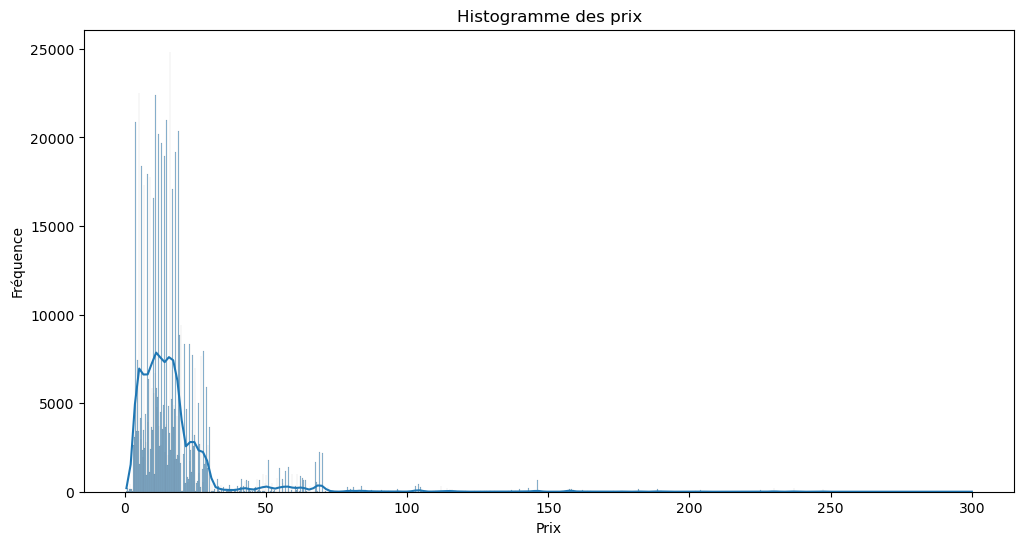

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True)
plt.title('Histogramme des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

In [65]:
total_price = comb.groupby('client_id')['price'].sum().reset_index()
total_price.columns = ['client_id', 'total_price']

df_merged = pd.merge(total_price, comb[['client_id', 'age']], on='client_id', how='left')

X = sm.add_constant(df_merged['age'])
y = df_merged['total_price']

model = sm.OLS(y, X).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

# bp_test[0] est la statistique du test, bp_test[1] est la p-value
print(f'Statistique de Breusch-Pagan: {bp_test[0]}')
print(f'P-value: {bp_test[1]}')


if bp_test[1] < 0.05:
    print("Il y a des preuves d'hétéroscédasticité.")
else:
    print("Aucune preuve d'hétéroscédasticité.")

Statistique de Breusch-Pagan: 3100.0190529970673
P-value: 0.0
Il y a des preuves d'hétéroscédasticité.


In [66]:
groups = []
for name, group in sans_btob.groupby('groupe_age'):
    groups.append(group['price'].values)
statistic, p_value = stats.kruskal(*groups)
print(f"Résultats du test de Kruskal-Wallis :")
print(f"Statistique : {statistic:.2f}")
print(f"P-value : {p_value:.4f}")

if p_value < 0.05:
    print("\nRejet de l'hypothèse nulle H0.")
    print("Conclusion : Il existe une différence significative entre les montants d'achat selon les groupes d'âge. Les différents groupes d'âge présentent des comportements d'achat distincts en termes de montant. (H1)")
else:
    print("\nOn ne rejette pas l'hypothèse nulle H0.")
    print("Conclusion : Il n’y a pas de différence significative entre les montants d'achat selon les groupes d'âge. L'âge des clients n'influence pas le montant total des achats. (H0)")

Résultats du test de Kruskal-Wallis :
Statistique : 55005.57
P-value : 0.0000

Rejet de l'hypothèse nulle H0.
Conclusion : Il existe une différence significative entre les montants d'achat selon les groupes d'âge. Les différents groupes d'âge présentent des comportements d'achat distincts en termes de montant. (H1)


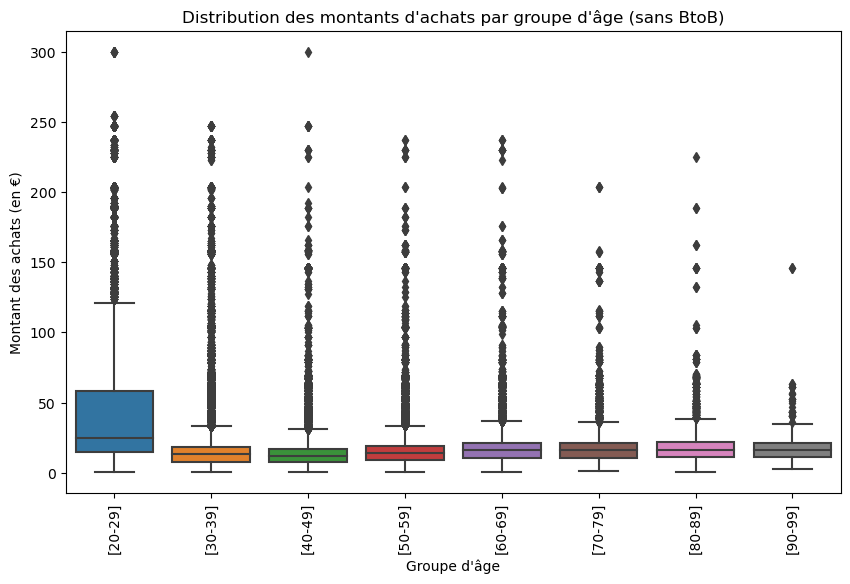

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='groupe_age', y='price', data=sans_btob)
plt.title("Distribution des montants d'achats par groupe d'âge (sans BtoB)")
plt.xlabel("Groupe d'âge")
plt.ylabel('Montant des achats (en €)')
plt.xticks(rotation=90)
plt.show()

In [68]:
stats_desc = sans_btob.groupby('groupe_age')['price'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nStatistiques descriptives des des montants d'achats par groupe d'âge (sans BtoB):")
stats_desc


Statistiques descriptives des des montants d'achats par groupe d'âge (sans BtoB):


,mean,median,std,count
groupe_age,,,,
[20-29],39.92,24.40,38.63,60611
[30-39],16.04,12.99,16.54,150970
[40-49],13.31,11.99,8.91,209497
[50-59],15.21,13.99,10.20,113037
[60-69],16.88,15.99,11.15,62529
[70-79],16.71,15.99,10.28,30054
[80-89],16.93,15.99,10.41,12220
[90-99],16.58,15.99,9.40,1816


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre l'age des clients et la fréquence d'achats</h3>
</div>

In [69]:
print("Identification des variables. L'age des clients : Qualitative. La fréquence d'achat : Quantitative")

Identification des variables. L'age des clients : Qualitative. La fréquence d'achat : Quantitative


In [70]:
print("Hypothèses du test")
print("Hypothèse nulle (H0):  Il n'y a pas de lien significatif entre l'âge et la fréquence des achats.") 
print("Hypothèse alternative (H1): il existe un lien significatif entre l'âge et la fréquence des achats.")

Hypothèses du test
Hypothèse nulle (H0):  Il n'y a pas de lien significatif entre l'âge et la fréquence des achats.
Hypothèse alternative (H1): il existe un lien significatif entre l'âge et la fréquence des achats.


In [71]:
frequency_df = comb.groupby('client_id').size().reset_index(name='frequency')

data = frequency_df['frequency']
mu = data.mean()  
sigma = data.std()

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(data, 'norm', args=(mu, sigma))


print(f'Statistique de Kolmogorov-Smirnov: {ks_test.statistic:.4f}, P-value: {ks_test.pvalue:.4f}')

if ks_test.pvalue < 0.05:
    print("Il y a des preuves que la fréquence d'achats ne suit pas une distribution normale (rejeter l'hypothèse nulle).")
else:
    print("Aucune preuve que la fréquence d'achats ne suit pas une distribution normale (ne pas rejeter l'hypothèse nulle).")

Statistique de Kolmogorov-Smirnov: 0.4011, P-value: 0.0000
Il y a des preuves que la fréquence d'achats ne suit pas une distribution normale (rejeter l'hypothèse nulle).


In [95]:
frequency_df = comb.groupby('client_id').size().reset_index(name='frequency')


frequency_age_df = pd.merge(frequency_df, cust[['client_id', 'groupe_age']], on='client_id', how='left')

# le test de Levene pour l'homoscédasticité en utilisant les groupes d'âge
levene_test = stats.levene(*[group['frequency'].values for name, group in frequency_age_df.groupby('groupe_age')])

print(f'Statistique de Levene: {levene_test.statistic:.4f}, P-value: {levene_test.pvalue:.4f}')

if levene_test.pvalue < 0.05:
    print("Il y a des preuves d'hétéroscédasticité entre les groupes d'âge.")
else:
    print("Aucune preuve d'hétéroscédasticité entre les groupes d'âge.")

Statistique de Levene: 6.0591, P-value: 0.0000
Il y a des preuves d'hétéroscédasticité entre les groupes d'âge.


In [73]:
frequency_age_df

,client_id,frequency,groupe_age
0,c_1,43,[60-69]
1,c_10,58,[60-69]
2,c_100,8,[30-39]
3,c_1000,126,[50-59]
4,c_1001,103,[40-49]
...,...,...,...
8595,c_995,14,[60-69]
8596,c_996,96,[50-59]
8597,c_997,59,[30-39]
8598,c_998,55,[20-29]


In [74]:
frequency_age_groups = [group['frequency'].values for name, group in frequency_age_df.groupby('groupe_age')]
anova_test = stats.f_oneway(*frequency_age_groups)

print(f'Statistique F: {anova_test.statistic:.4f}, P-value: {anova_test.pvalue:.4f}')

if anova_test.pvalue < 0.05:
    print("Il y a des différences significatives dans la fréquence d'achat entre les groupes d'âge.")
else:
    print("Aucune différence significative dans la fréquence d'achat entre les groupes d'âge.")

Statistique F: 14.2142, P-value: 0.0000
Il y a des différences significatives dans la fréquence d'achat entre les groupes d'âge.


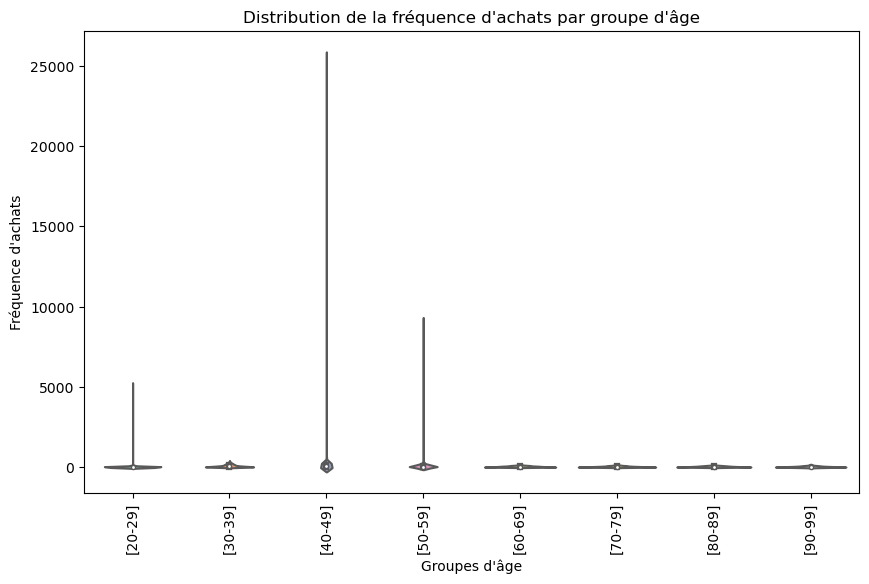

In [75]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='groupe_age', y='frequency', data=frequency_age_df, palette='Set2', inner="box")

plt.xlabel('Groupes d\'âge')
plt.ylabel('Fréquence d\'achats')
plt.title('Distribution de la fréquence d\'achats par groupe d\'âge')
plt.xticks(rotation=90) 

plt.show()

In [76]:
age_freq_mois_sans_btob = sans_btob.groupby(['groupe_age', 'periode'])['session_id'].count().reset_index()
age_freq_mois_sans_btob.rename(columns={'session_id': 'frequence'}, inplace=True)
age_freq_pivot = age_freq_mois_sans_btob.pivot_table(index='periode', columns='groupe_age', values='frequence', fill_value=0)
age_freq_pivot.head()

groupe_age,[20-29],[30-39],[40-49],[50-59],[60-69],[70-79],[80-89],[90-99]
periode,,,,,,,,
2021-03,2282,6565,8687,4732,2622,1201,498,60
2021-04,2315,6593,8877,4590,2477,1087,458,73
2021-05,2404,6207,8936,4545,2406,1208,504,62
2021-06,2540,5971,7894,4443,2490,1214,405,81
2021-07,2751,5328,7156,3848,2362,1079,499,52


In [77]:
age_freq_pourc = (age_freq_pivot.div(age_freq_pivot.sum(axis=1), axis=0) * 100).round(2)
age_freq_pourc.head()

groupe_age,[20-29],[30-39],[40-49],[50-59],[60-69],[70-79],[80-89],[90-99]
periode,,,,,,,,
2021-03,8.56,24.64,32.60,17.76,9.84,4.51,1.87,0.23
2021-04,8.75,24.91,33.54,17.34,9.36,4.11,1.73,0.28
2021-05,9.15,23.63,34.01,17.30,9.16,4.60,1.92,0.24
2021-06,10.14,23.85,31.53,17.75,9.94,4.85,1.62,0.32
2021-07,11.92,23.09,31.01,16.68,10.24,4.68,2.16,0.23


In [78]:
age_freq_moymob = age_freq_pivot.rolling(window=3,center=True, min_periods=1).mean().round(2)
age_freq_moymob.head()

groupe_age,[20-29],[30-39],[40-49],[50-59],[60-69],[70-79],[80-89],[90-99]
periode,,,,,,,,
2021-03,2298.50,6579.00,8782.00,4661.00,2549.50,1144.00,478.00,66.50
2021-04,2333.67,6455.00,8833.33,4622.33,2501.67,1165.33,486.67,65.00
2021-05,2419.67,6257.00,8569.00,4526.00,2457.67,1169.67,455.67,72.00
2021-06,2565.00,5835.33,7995.33,4278.67,2419.33,1167.00,469.33,65.00
2021-07,2609.67,5672.67,7599.67,4133.67,2365.33,1129.33,439.00,73.33


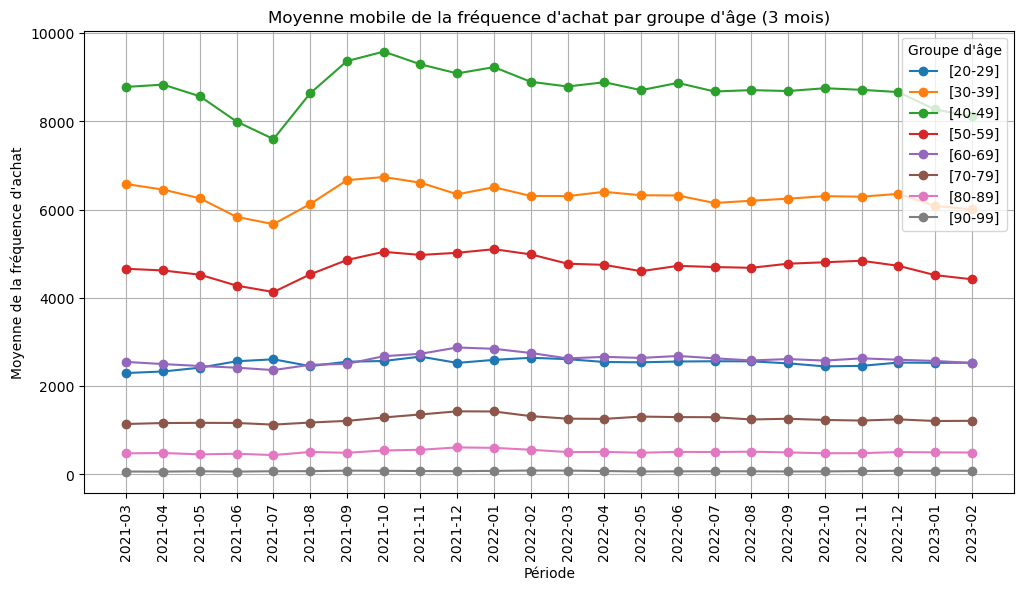

In [79]:
plt.figure(figsize=(12, 6))

for age_group in age_freq_moymob.columns:
    plt.plot(age_freq_moymob.index, age_freq_moymob[age_group], marker='o', label=age_group)

plt.title('Moyenne mobile de la fréquence d\'achat par groupe d\'âge (3 mois)')
plt.xlabel('Période')
plt.ylabel('Moyenne de la fréquence d\'achat')
plt.legend(title='Groupe d\'âge')
plt.xticks(rotation=90)  
plt.grid()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre l'age des clients et la taille du panier moyen</h3>
</div>

In [80]:
print("Identification des variables. L'age des clients : Quantitative. La taille du panier moyen : Quantitative")

Identification des variables. L'age des clients : Quantitative. La taille du panier moyen : Quantitative


In [81]:
age_panier_moy = sans_btob.groupby(['client_id', 'age']).agg(
    total_price=('price', 'sum'),
    total_sessions=('session_id', 'count')
).reset_index()
age_panier_moy['panier_moyen'] = (age_panier_moy['total_price'] / age_panier_moy['total_sessions']).round(2)
age_panier_moy.head()

,client_id,age,total_price,total_sessions,panier_moyen
0,c_1,69,629.02,43,14.63
1,c_10,68,1353.60,58,23.34
2,c_100,32,254.85,8,31.86
3,c_1000,58,2291.88,126,18.19
4,c_1001,42,1823.85,103,17.71


In [82]:
model = smf.ols('panier_moyen ~ age', data=age_panier_moy).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

print("Test de Breusch-Pagan pour l'homoscédasticité :")
print(f"Statistique: {bp_test[0]:.4f}, P-value: {bp_test[1]:.4f}")

if bp_test[1] < 0.05:
    print("Il y a des preuves d'hétéroscédasticité dans les résidus de la régression.")
else:
    print("Aucune preuve d'hétéroscédasticité dans les résidus de la régression.")

Test de Breusch-Pagan pour l'homoscédasticité :
Statistique: 379.7096, P-value: 0.0000
Il y a des preuves d'hétéroscédasticité dans les résidus de la régression.


In [83]:
ks_test_age = stats.kstest(age_panier_moy['age'], 'norm', 
                           args=(age_panier_moy['age'].mean(), age_panier_moy['age'].std()))

print("Test de Kolmogorov-Smirnov (normalité de l'âge) :")
print(f"Statistique de test K-S : {ks_test_age.statistic:.4f}")
print(f"P-value K-S : {ks_test_age.pvalue:.4f}")

# Interprétation du test
if ks_test_age.pvalue < 0.05:
    print("La distribution des âges ne suit pas une distribution normale.")
else:
    print("La distribution des âges suit une distribution normale.")

Test de Kolmogorov-Smirnov (normalité de l'âge) :
Statistique de test K-S : 0.0640
P-value K-S : 0.0000
La distribution des âges ne suit pas une distribution normale.


In [84]:
corr, p_value = spearmanr(age_panier_moy['age'], age_panier_moy['panier_moyen'])


print(f"Coefficient de corrélation de Spearman : {corr}")
print(f"P-value : {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Il y a une corrélation significative entre l'âge et la taille du panier moyen.")
else:
    print("Il n'y a pas de corrélation significative entre l'âge et la taille du panier moyen.")

Coefficient de corrélation de Spearman : -0.3258739678033213
P-value : 8.203451155964698e-212
Il y a une corrélation significative entre l'âge et la taille du panier moyen.


In [96]:
age_panier_moy

,client_id,age,total_price,total_sessions,panier_moyen,groupe_age
0,c_1,69,629.02,43,14.63,[60-69]
1,c_10,68,1353.60,58,23.34,[60-69]
2,c_100,32,254.85,8,31.86,[30-39]
3,c_1000,58,2291.88,126,18.19,[50-59]
4,c_1001,42,1823.85,103,17.71,[40-49]
...,...,...,...,...,...,...
8591,c_995,69,189.41,14,13.53,[60-69]
8592,c_996,54,1637.34,96,17.06,[50-59]
8593,c_997,30,1490.01,59,25.25,[30-39]
8594,c_998,23,2822.22,55,51.31,[20-29]


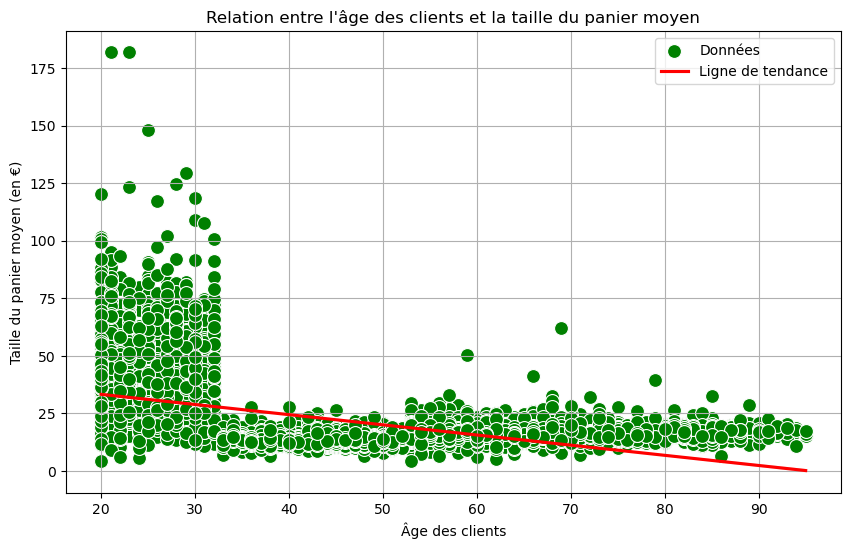

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='panier_moyen', data=age_panier_moy, color='green', s=100, label='Données')
sns.regplot(x='age', y='panier_moyen', data=age_panier_moy, scatter=False, color='red', label='Ligne de tendance')


plt.title('Relation entre l\'âge des clients et la taille du panier moyen')
plt.xlabel('Âge des clients')
plt.ylabel('Taille du panier moyen (en €)')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['[20-29]', '[30-39]', '[40-49]', '[50-59]', '[60-69]', '[70-79]', '[80-89]', '[90-99]']
age_panier_moy['groupe_age'] = pd.cut(age_panier_moy['age'], bins=bins, labels=labels, right = False)
comb = pd.merge(base, cust, on='client_id', how='left')
comb.head()


,id_prod,date,session_id,client_id,price,categ,periode,annee,mois,sex,birth,age,groupe_age
0,0_1259,2021-03-01,s_1,c_329,11.99,0,2021-03,2021,3,f,1967,57,[50-59]
1,0_1390,2021-03-01,s_2,c_664,19.37,0,2021-03,2021,3,m,1960,64,[60-69]
2,0_1352,2021-03-01,s_3,c_580,4.50,0,2021-03,2021,3,m,1988,36,[30-39]
3,0_1458,2021-03-01,s_4,c_7912,6.55,0,2021-03,2021,3,f,1989,35,[30-39]
4,0_1358,2021-03-01,s_5,c_2033,16.49,0,2021-03,2021,3,f,1956,68,[60-69]


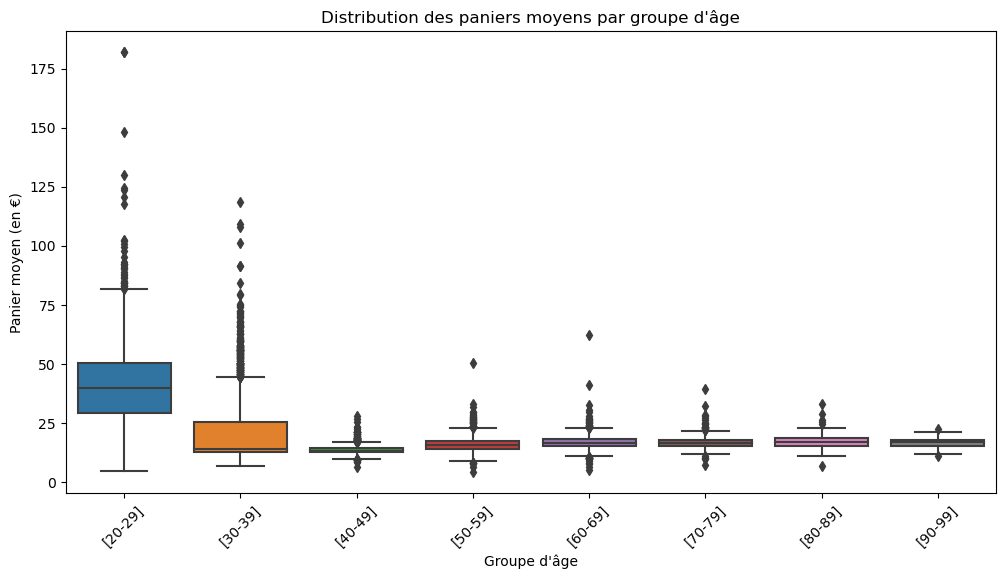

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='groupe_age', y='panier_moyen', data=age_panier_moy)
plt.title('Distribution des paniers moyens par groupe d\'âge')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Panier moyen (en €)')
plt.xticks(rotation=45)
plt.show()

In [88]:
stats_desc = age_panier_moy.groupby('groupe_age')['panier_moyen'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nStatistiques descriptives des paniers moyens par groupe d'âge :")
stats_desc


Statistiques descriptives des paniers moyens par groupe d'âge :


,mean,median,std,count
groupe_age,,,,
[20-29],41.26,39.61,17.15,1788
[30-39],21.56,13.98,15.25,1620
[40-49],13.49,13.25,1.77,1771
[50-59],15.79,15.68,3.10,1515
[60-69],16.81,16.56,3.15,1076
[70-79],16.75,16.49,2.81,565
[80-89],16.94,16.91,2.79,223
[90-99],16.62,16.79,2.29,38


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre l'age des clients et la catégorie des livres achetés</h3>
</div>

In [89]:
age_category = sans_btob.groupby(['groupe_age', 'categ']).size().unstack(fill_value=0)
total_age = sans_btob.groupby('groupe_age').size()
age_category_p = (age_category.div(total_age, axis=0) * 100).round(2)
age_category_p

categ,0,1,2
groupe_age,,,
[20-29],22.05,38.96,38.99
[30-39],69.89,25.63,4.48
[40-49],75.17,24.47,0.36
[50-59],57.84,41.51,0.66
[60-69],42.78,56.31,0.91
[70-79],42.92,56.23,0.85
[80-89],42.10,56.92,0.97
[90-99],41.80,57.43,0.77


In [90]:
tab = pd.crosstab(sans_btob['groupe_age'], sans_btob['categ'])
tab

categ,0,1,2
groupe_age,,,
[20-29],13365,23616,23630
[30-39],105507,38700,6763
[40-49],157479,51264,754
[50-59],65377,46917,743
[60-69],26751,35209,569
[70-79],12898,16900,256
[80-89],5145,6956,119
[90-99],759,1043,14


In [91]:
print("Identification des variables. L'age des clients : Qualitative. La catégorie des livres : Qualitative")

Identification des variables. L'age des clients : Qualitative. La catégorie des livres : Qualitative


In [92]:
print("Hypothèses du test")
print("Hypothèse nulle (H0): Il n'y a pas de relation significative entre l'age' et les catégories de livres.Les deux variables sont indépendantes.") 
print("Hypothèse alternative (H1): Il existe une relation significative entre l'age' et les catégories de livres. Les deux variables sont dépendantes ")

Hypothèses du test
Hypothèse nulle (H0): Il n'y a pas de relation significative entre l'age' et les catégories de livres.Les deux variables sont indépendantes.
Hypothèse alternative (H1): Il existe une relation significative entre l'age' et les catégories de livres. Les deux variables sont dépendantes 


In [93]:
chi2, p_value, dof, expected = stats.chi2_contingency(tab)

print("Résultats du test du chi-deux :")
print(f"Statistique du chi2 : {chi2:.2f}")
print(f"P-value : {p_value:.4f}")

if p_value < 0.05:
    print(f"\nAvec une p-value de {p_value:.4f}, nous rejetons l'hypothèse nulle (H0) au niveau de signification de {alpha}.")
    print("Conclusion : Il existe une relation statistiquement significative entre l'âge des clients et les catégories de livres achetés.")
else:
    print(f"\nAvec une p-value de {p_value:.4f}, nous ne pouvons pas rejeter l'hypothèse nulle (H0) au niveau de signification de {alpha}.")
    print("Conclusion : Il n'y a pas de relation statistiquement significative entre l'âge des clients et les catégories de livres achetés.")


Résultats du test du chi-deux :
Statistique du chi2 : 209618.73
P-value : 0.0000

Avec une p-value de 0.0000, nous rejetons l'hypothèse nulle (H0) au niveau de signification de 0.05.
Conclusion : Il existe une relation statistiquement significative entre l'âge des clients et les catégories de livres achetés.


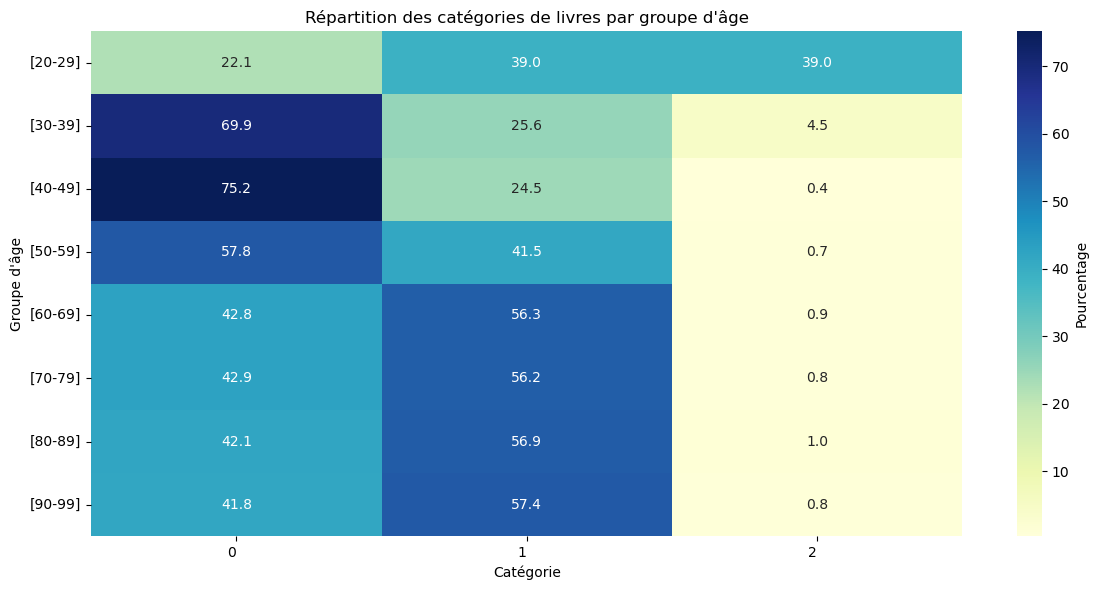

In [94]:
plt.figure(figsize=(12, 6))

sns.heatmap(age_category_p, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Pourcentage'})

plt.title("Répartition des catégories de livres par groupe d'âge")
plt.xlabel("Catégorie")
plt.ylabel("Groupe d'âge")
plt.xticks(rotation=0, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()